# Selecionando parâmetros para o KNN

Neste notebook selecionaremos o melhor valor de K para o algoritmo de seleção KNN

### Importar as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

### Carregar os dados 

In [2]:
# Dados de treinameto
training_mean = pd.read_csv("data/training_mean.csv").set_index('sessionNo') # Missing values substituídos pela média
training_mode = pd.read_csv("data/training_mode.csv").set_index('sessionNo') # Missing values substituídos pela moda
training_median = pd.read_csv("data/training_median.csv").set_index('sessionNo') # Missing values substitídos pela mediana

# Dados de teste
testing_mean = pd.read_csv("data/testing_mean.csv").set_index('sessionNo') # Missing values substituídos pela média
testing_mode = pd.read_csv("data/testing_mode.csv").set_index('sessionNo') # Missing values substituídos pela moda
testing_median = pd.read_csv("data/testing_median.csv").set_index('sessionNo') # Missing values substitídos pela mediana

## Escolher o melhor parâmetro K para o KNN e a melhor estratégia para tratamento de missing values

### Separar um dataframe em um vetor de características e  um vetor de classe

In [3]:
def splitData(df):
    x = df.iloc[:, :-1]
    y = df['order']
    return x, y

### Testar o classificador

Variando o valor de k entre 1 e 201 passo 2

In [4]:
def makeErrosKnn(df_train, df_test, length):
    x_train, y_train = splitData(df_train)
    x_test, y_test = splitData(df_test)
    ks = list(range(1, length, 2))
    errors = []
    
    best = 1
    minimun = 5111.
    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
        knn.fit(x_train, y_train)
        erro = abs(y_test - knn.predict(x_test)).sum()
        if(erro < minimun):
            minimun = erro
            best = k
        errors.append(erro)
    return errors, minimun, best

### Melhor K para a estratégia de substituir missing values pela média

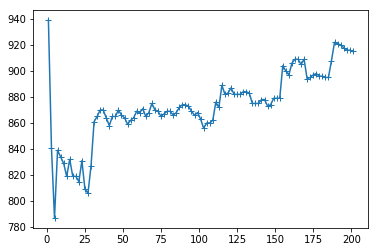

Minimun erro: 787.0 Best k: 5


In [5]:
errors, minimun, best = makeErrosKnn(training_mean, testing_mean, 203)
plt.plot(list(range(1, 203, 2)), errors, marker='+')
plt.show()
print('Minimun erro: '+ str(minimun) +' Best k: '+ str(best))

### Melhor K para a estratégia de substituir missing values pela moda

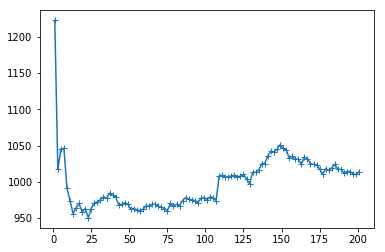

Minimun erro: 950.0 Best k: 23


In [6]:
errors, minimun, best = makeErrosKnn(training_mode, testing_mode, 203)
plt.plot(list(range(1, 203, 2)), errors, marker='+')
plt.show()
print('Minimun erro: '+ str(minimun) +' Best k: '+ str(best))

### Melhor K para a estratégia de substituir missing values pela mediana

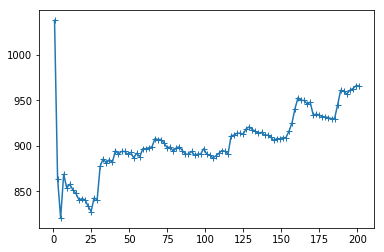

Minimun erro: 821.0 Best k: 5


In [7]:
errors, minimun, best = makeErrosKnn(training_median, testing_median, 203)
plt.plot(list(range(1, 203, 2)), errors, marker='+')
plt.show()
print('Minimun erro: '+ str(minimun) +' Best k: '+ str(best))

Verificamos nesta etapa que a melhor combinação de estratégia para a classificação com KNN é utilizar a substituição dos _missing values_ pela média e K = 5.

## Escolher a melhor quantidade de estimadores para o RF e a melhor estratégia para tratamento de missing values

## Testando o classificador
 
Variando a quantidade de estimadores entre 1 e 201, passo 2, e entre 1 e 2000, passo 50.

In [8]:
def errorRandomForest(df_train, df_test, length, step):
    x_train, y_train = splitData(df_train)
    x_test, y_test = splitData(df_test)
    estimators = list(range(1, length, step))
    errors = []
    
    best = 1
    minimun = 5111.
    for e in estimators:
        rf = RandomForestClassifier(n_estimators=e, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)
        rf.fit(x_train, y_train)
        erro = abs(y_test - rf.predict(x_test)).sum()
        if(erro < minimun):
            minimun = erro
            best = e
        errors.append(erro)
    return errors, minimun, best

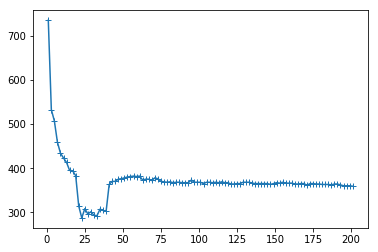

Minimun erro: 287.0 Best e: 23


In [9]:
errors, minimun, best = errorRandomForest(training_mean, testing_mean, 203, 2)
plt.plot(list(range(1, 203, 2)), errors, marker='+')
plt.show()
print('Minimun erro: '+ str(minimun) +' Best e: '+ str(best))

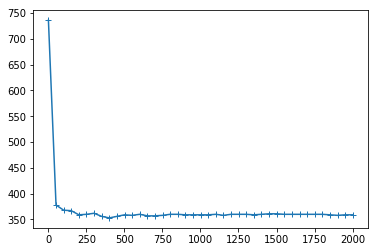

Minimun erro: 353.0 Best e: 401


In [10]:
errors, minimun, best = errorRandomForest(training_mean, testing_mean, 2003, 50)
plt.plot(list(range(1, 2003, 50)), errors, marker='+')
plt.show()
print('Minimun erro: '+ str(minimun) +' Best e: '+ str(best))

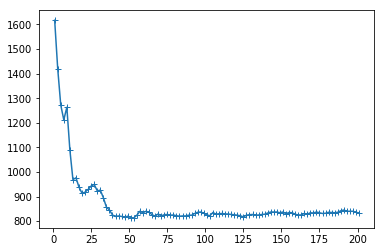

Minimun erro: 813.0 Best e: 53


In [11]:
errors, minimun, best = errorRandomForest(training_mode, testing_mode, 203, 2)
plt.plot(list(range(1, 203, 2)), errors, marker='+')
plt.show()
print('Minimun erro: '+ str(minimun) +' Best e: '+ str(best))

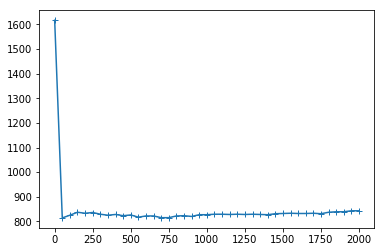

Minimun erro: 814.0 Best e: 51


In [12]:
errors, minimun, best = errorRandomForest(training_mode, testing_mode, 2003, 50)
plt.plot(list(range(1, 2003, 50)), errors, marker='+')
plt.show()
print('Minimun erro: '+ str(minimun) +' Best e: '+ str(best))

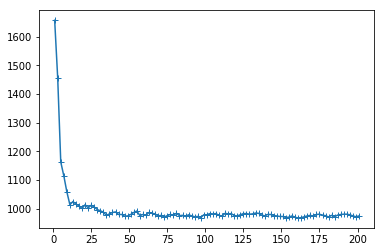

Minimun erro: 968.0 Best e: 161


In [13]:
errors, minimun, best = errorRandomForest(training_median, testing_median, 203, 2)
plt.plot(list(range(1, 203, 2)), errors, marker='+')
plt.show()
print('Minimun erro: '+ str(minimun) +' Best e: '+ str(best))

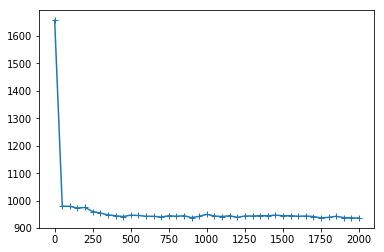

Minimun erro: 937.0 Best e: 1751


In [15]:
errors, minimun, best  = errorRandomForest(training_median, testing_median, 2003, 50)
plt.plot(list(range(1, 2003, 50)), errors, marker='+')
plt.show()
print('Minimun erro: '+ str(minimun) +' Best e: '+ str(best))

## Testando o classificador Arvore de Decisão

In [16]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=None, min_samples_split=2,random_state=0)

### Realiza classificação com a arvore de decisão

In [17]:
def errorDecisionTree(df_train, df_test):
    x_train, y_train = splitData(df_train)
    x_test, y_test = splitData(df_test)
    tree.fit(x_train,y_train)
    error = abs(y_test - tree.predict(x_test)).sum()
    return error

### Erro calulado com a estratégia de substituir missing values pela média

In [18]:
errorDecisionTree(training_mean, testing_mean)

736.0

### Erro calulado com a estratégia de substituir missing values pela moda

In [19]:
errorDecisionTree(training_mode, testing_mode)

1254.0

### Erro calulado com a estratégia de substituir missing values pela mediana

In [20]:
errorDecisionTree(training_median, testing_median)

1391.0